In [1]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()

In [2]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
# Open/create a file to append data to
csvFile = open('../dataset/prova.csv', 'a', encoding="UTF-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:seriouseats AND -filter:retweets AND -filter:replies",
                           until='2020-09-2',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.retweet_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use UTF-8 encoding
    csvWriter.writerow([tweet.user.screen_name, tweet.created_at, tweet.full_text,tweet.retweet_count, ratio])
csvFile.close()

In [4]:
len(tweets)

58

In [5]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-09-01 22:00:00 4
2020-09-01 20:00:01 12
2020-09-01 18:33:48 10
2020-09-01 16:00:01 9
2020-09-01 14:00:01 4
2020-09-01 12:00:00 10
2020-09-01 01:00:00 5
2020-08-31 22:00:00 6
2020-08-31 20:06:57 2
2020-08-31 20:00:00 4
2020-08-31 18:00:01 10
2020-08-31 16:00:02 7
2020-08-31 14:00:00 11
2020-08-31 12:00:00 11
2020-08-31 01:00:00 4
2020-08-30 22:00:00 5
2020-08-30 20:00:00 8
2020-08-30 18:00:00 6
2020-08-30 16:00:01 4
2020-08-30 14:00:01 9
2020-08-30 12:00:01 12
2020-08-30 01:00:00 5
2020-08-29 22:00:01 8
2020-08-29 20:00:01 7
2020-08-29 18:00:01 13
2020-08-29 16:00:00 6
2020-08-29 14:00:00 5
2020-08-29 12:00:01 9
2020-08-29 01:00:00 4
2020-08-28 22:12:27 10
2020-08-28 20:31:19 1
2020-08-28 20:00:01 7
2020-08-28 18:05:08 4
2020-08-28 16:00:01 5
2020-08-28 14:01:40 10
2020-08-28 12:00:01 5
2020-08-28 01:00:01 12
2020-08-27 22:00:01 6
2020-08-27 20:00:01 6
2020-08-27 18:52:34 4
2020-08-27 16:00:00 10
2020-08-27 14:04:43 10
2020-08-27 12:00:02 10
2020-08-27 01:00:00 2
2020-08-26 22:00:0

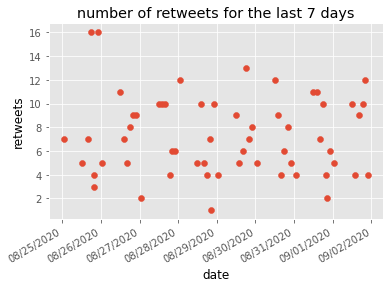

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(date,retweet_count)
plt.gcf().autofmt_xdate()